# Packages

In [1]:
!pip install tabulate



[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# Reading data

In [3]:
df = pd.read_csv("car_dataframe.csv")
df

,fuel_consumption_km_l,traccion,transmision,aux,android_auto,apple_carplay,bluetooth,cd,dvd,hdmi,...,disc_brakes.1,stop_go_function,electric_locks,anti_collision_system,model_describe,monthly_price,price,km,brand,age
0,7,4x2,Automático,Sí,No,No,Sí,No,No,No,...,No,Sí,Llave de la tarjeta,Sí,3.5 S 400 L CGI AT,6865,550999,110980,Mercedes Benz,9
1,10,4x4,Automático,Sí,No,No,Sí,Sí,No,No,...,No,No,Llave de la tarjeta,Sí,3.0 PREMIUM AUTO 4WD,8108,660999,46520,Audi,7
2,11,4x4,Automático,No,No,No,Sí,No,No,No,...,No,No,Teléfono móvil,Sí,2.0 SPORT 300 AUTO 4WD,9792,809999,18850,Jaguar Xe,6
3,17,4x2,Automático,Sí,Sí,Sí,Sí,No,No,No,...,No,No,Llave de la tarjeta,No,1.4 XCELLENCE DCT,4774,365999,55259,Seat,6
4,12,4x4,Automático,Sí,No,No,No,No,No,No,...,No,No,Llave de la tarjeta,Sí,2.0 MOMENTUM T6 AWD AUTO,7192,579999,109560,Volvo,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,14,4x2,Manual,No,No,No,No,No,No,No,...,No,No,NoInfo,No,1.6 SEDAN CL,2310,147999,91732,Volkswagen,9
1873,14,4x2,Manual,No,No,No,No,No,No,No,...,No,No,NoInfo,No,1.6 LIFE,2457,160999,80100,Renault,7
1874,15,4x2,Manual,Sí,No,No,No,No,No,No,...,No,No,Remoto,No,1.6 MT J LT,2468,161999,106616,Chevrolet,8
1875,9,4x4,Automático,No,No,No,No,No,No,No,...,No,No,NoInfo,No,2.3 RESERVE AWD AT,4118,307999,104244,Lincoln,9


In [4]:
df = df.drop_duplicates()
brand_counts = pd.DataFrame(df['brand'].value_counts())
brand_counts

,count
brand,
Chevrolet,156
Volkswagen,145
Nissan,143
Mazda,120
Honda,113
Kia,104
Ford,104
Bmw,95
Audi,94


/tmp/ipykernel_143/843731007.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette=bar_colors)


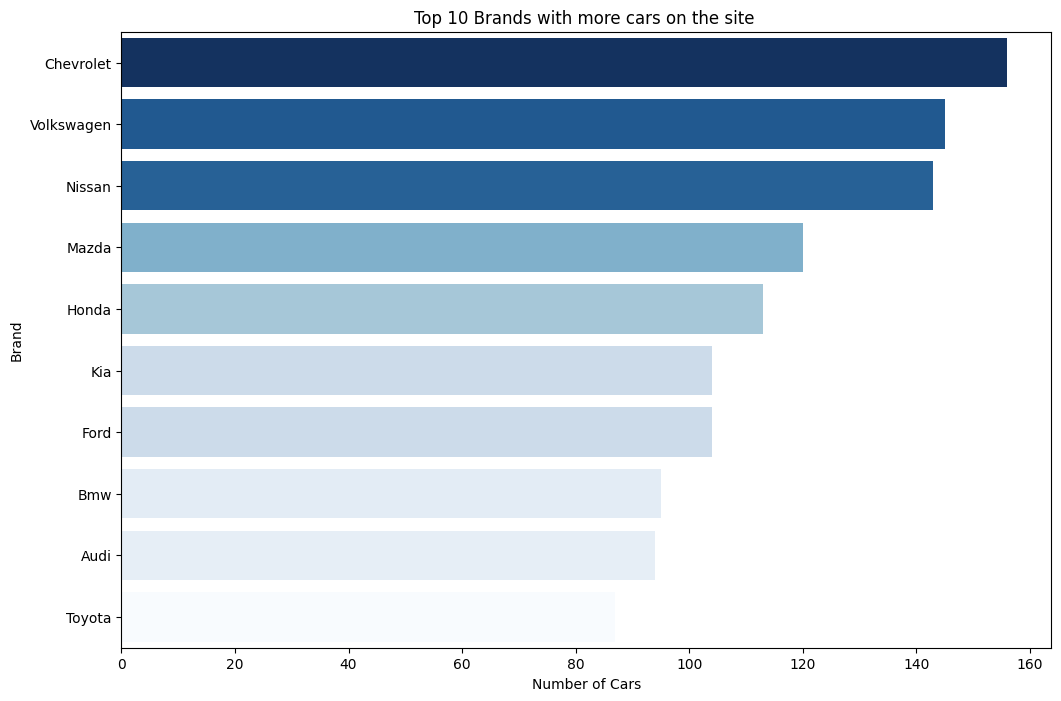

In [5]:
df = pd.read_csv('car_dataframe.csv')

df = df.drop_duplicates()

brand_counts = df['brand'].value_counts()

top_10_brands = brand_counts.head(10)

#
norm = plt.Normalize(top_10_brands.min(), top_10_brands.max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# Plot the bar chart
plt.figure(figsize=(12, 8))
bar_colors = [sm.to_rgba(value) for value in top_10_brands.values]
sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette=bar_colors)
plt.title('Top 10 Brands with more cars on the site ')
plt.xlabel('Number of Cars')
plt.ylabel('Brand')



plt.show()



In [6]:
df = pd.read_csv('car_dataframe.csv')


unique_engine_types = df['engine_type'].unique()


num_unique_engine_types = len(unique_engine_types)


print(f"There are {num_unique_engine_types} unique engine types.")
print("The unique engine types are:")
for engine_type in unique_engine_types:
    print(engine_type)


There are 6 unique engine types.
The unique engine types are:
Combustión
Eléctrico
Híbrido
Mild Hybrid
NoInfo
Motor Supercargado


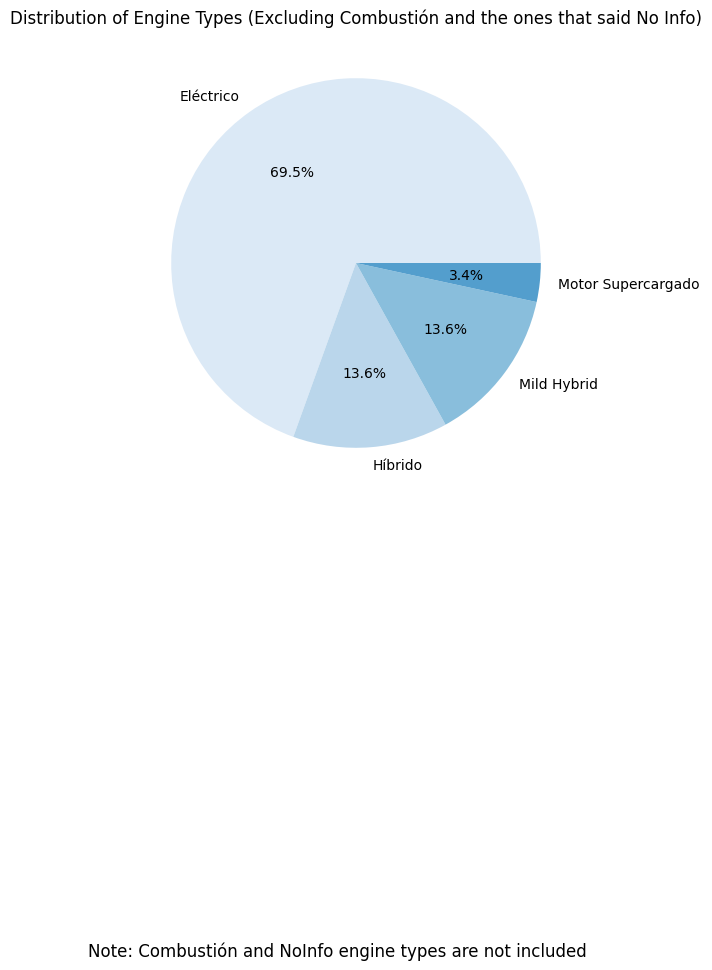

In [7]:
df = pd.read_csv('car_dataframe.csv')


engine_type_counts = df['engine_type'].value_counts()

engine_type_counts = engine_type_counts.drop(['Combustión', 'NoInfo'], errors='ignore')


colors = sns.color_palette('Blues',)

plt.figure(figsize=(10, 6))
plt.pie(engine_type_counts, labels=engine_type_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Engine Types (Excluding Combustión and the ones that said No Info)')
plt.annotate('Note: Combustión and NoInfo engine types are not included', xy=(1, -1), xycoords='axes fraction', fontsize=12, ha='right')

plt.show()


In [8]:
len(df)

1877

# Duplicates

In [9]:
df.duplicated().sum()

0

## Delete duplicates

In [10]:
df = df.drop_duplicates()

# Nulls

In [11]:
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 22


In [12]:
df.isnull().sum()[20:]

steering_wheel_controls         0
front_cupholders                0
rear_cupholders                 0
sunroof                         0
front_sensor                    0
rear_sensor                     0
rain_sensor                     0
panoramic_roof                  0
external_temperature            0
horsepower                      0
fuel_type                       0
displacement                   22
gears                           0
start_stop                      0
engine_type                     0
torque                          0
turbo                           0
power_windows_front             0
power_windows_rear              0
extras                          0
driver_seat_adjustment          0
rearview_mirror_camera          0
seat_material                   0
passengers                      0
trunk_opening                   0
headlights                      0
wheel_material                  0
doors                           0
wheels                          0
body_type     

## Checking nulls

In [13]:
df[df['displacement'].isnull()]

,fuel_consumption_km_l,traccion,transmision,aux,android_auto,apple_carplay,bluetooth,cd,dvd,hdmi,...,disc_brakes.1,stop_go_function,electric_locks,anti_collision_system,model_describe,monthly_price,price,km,brand,age
184,0,4x2,Automático,No,No,Sí,No,No,No,No,...,No,No,Teléfono móvil,No,SPORT AUTO,6605,527999,39561,Bmw,5
444,18,4x2,Manual,No,No,No,No,No,No,No,...,No,No,NoInfo,No,1.2 LS A,2411,156999,54051,Chevrolet,7
1052,9,4x2,Automático,Sí,No,No,No,No,No,No,...,No,No,Remoto,No,2.5 S I4 AT,2796,190999,92000,Ford,11
1053,18,4x2,Automático,Sí,No,No,No,No,No,No,...,No,No,Llave de la tarjeta,No,1.6 ADVANCE AUTO,3067,214999,58681,Nissan,8
1147,14,4x2,Automático,No,Sí,Sí,No,No,No,No,...,No,No,Llave de la tarjeta,No,1.6 CONNECT CVT,4084,304999,18204,Jac,3
1226,18,4x2,Automático,Sí,No,No,No,No,No,No,...,No,No,Llave de la tarjeta,No,1.6 ADVANCE AUTO,3067,214999,58681,Nissan,8
1228,9,4x4,Automático,No,No,No,No,No,No,No,...,No,No,NoInfo,No,2.3 RESERVE AWD AT,4118,307999,104244,Lincoln,9
1229,9,4x2,Automático,Sí,No,No,No,No,No,No,...,No,No,Remoto,No,2.5 S I4 AT,2796,190999,92000,Ford,11
1318,9,4x2,Automático,No,No,No,No,No,No,No,...,No,No,Llave de la tarjeta,No,1.5 TGDI QUANTUM DCT,5689,446999,29142,Jac,3
1355,14,4x2,Automático,Sí,No,No,No,No,No,No,...,No,No,Remoto,No,1.4 DYNAMIC DCT,4095,305999,71000,Audi,7


## Replace nulls

In [14]:
medians = df.groupby('brand')['displacement'].transform('median')

In [15]:
df['displacement'] = df['displacement'].fillna(medians)

In [16]:
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


# Checking categorical variables to select or ignore

In [17]:
per_data = []

# Iterate over columns of object dtype
for col in df.select_dtypes(include=['object']):
    # Calculate value counts as percentages
    percentages = df[col].value_counts(normalize=True) * 100
    # Iterate over each value and its percentage
    for category, percentage in percentages.items():
        # Append data as a dictionary
        per_data.append({'Column': col, 'Category': category, 'Percentage': percentage})

# Create a new DataFrame from the list of dictionaries
df_per = pd.DataFrame(per_data)

In [18]:
df_per

,Column,Category,Percentage
0,traccion,4x2,87.426745
1,traccion,4x4,12.573255
2,transmision,Automático,78.742674
3,transmision,Manual,21.257326
4,aux,Sí,74.054342
...,...,...,...
1221,brand,Chrysler,0.266383
1222,brand,Subaru,0.213106
1223,brand,Alfa Romeo,0.213106
1224,brand,Jaguar Xe,0.159830


In [19]:
df = df[df['fuel_type']!='Eléctrico']

Variables categorical to select (percentage of category =< 72):
- touch_screen
- navigation_system
- push_start
- rear_cupholders
- sunroof
- rear_sensor
- start_stop
- turbo
- seat_material (reclassify)
- trunk_opening
- headlights (reclassify)
- body_type
- electric_parking_brake
- electric_locks (reclassify)

Variables categorical to ignore because are constant (percentage of category > 72) or have many categories:
- traccion
- transmision
- aux*
- android_auto*
- apple_carplay*
- bluetooth
- cd
- dvd
- hdmi
- radio
- sd_card
- ac
- alarm
- keyless_entry
- camera
- power_mirrors
- steering_wheel_controls
- front_cupholders
- front_sensor
- rain_sensor
- panoramic_roof
- external_temperature
- fuel_type
- engine_type
- power_windows_front
- power_windows_rear
- extras
- driver_seat_adjustment
- rearview_mirror_camera
- wheel_material
- rear_window
- lane_departure_warning
- isofix_anchor
- brake_assist
- front_airbags
- side_airbags
- hill_descent_control
- cruise_control
- traction_control
- disc_brakes
- automatic_collision_braking
- abs_brakes
- disc_brakes.1
- stop_go_function
- anti_collision_system
- model_describe
- brand

In [20]:
var_int = df.drop('monthly_price', axis=1).select_dtypes(include=['int', 'float']).columns.tolist()
var_disc = ['touch_screen', 'navigation_system', 
'push_start', 'rear_cupholders', 'sunroof', 'rear_sensor', 
'start_stop', 'turbo', 'seat_material', 'trunk_opening', 
'headlights', 'body_type', 'electric_parking_brake', 
'electric_locks']
df = df[var_int + var_disc]

# Reclassify

In [21]:
replace_map = {'Tela': 'Tela', 'Tela/Terciopelo': 'Tela', 
               'Piel': 'Piel', 'Piel perforada': 'Piel',  'Piel premium': 'Piel', 
               'Gamuza Sintética': 'Gamuza', 'Gamuza': 'Gamuza',
               'NoInfo': 'OtroMaterial', 'Cuero Sintético': 'OtroMaterial',  'Tela/Piel': 'OtroMaterial'}

In [22]:
df['seat_material'] = df['seat_material'].map(replace_map)

In [23]:
df['seat_material'].unique()

array(['Piel', 'Gamuza', 'OtroMaterial', 'Tela'], dtype=object)

In [24]:
replace_map = {'Llave de la tarjeta': 'Llave', 'Llave': 'Llave', 
               'Remoto':'Remoto',
               'Teléfono móvil': 'OtroElectricLocks', 
               'NoInfo': 'OtroElectricLocks',  
               'Teclado digital': 'OtroElectricLocks', 
               'Interno': 'OtroElectricLocks'}

In [25]:
df['electric_locks'] = df['electric_locks'].map(replace_map)

In [26]:
df['electric_locks'].unique()

array(['Llave', 'OtroElectricLocks', 'Remoto'], dtype=object)

In [27]:
replace_map = {'Estándar': 'Estándar', 
               'Faros de Niebla': 'Faros', 
               'Faros Halógenos': 'Faros', 
               'NoInfo':'OtroHeadlights'}

In [28]:
df['headlights'] = df['headlights'].map(replace_map)

In [29]:
df['headlights'].unique()

array(['Estándar', 'OtroHeadlights', 'Faros'], dtype=object)

# EDA

## Correlation

Follow analisis will show the finding between the selected features of a car and their prices

## Data dictionary

<img src="image-20240622-175044.png" width="" align="" />

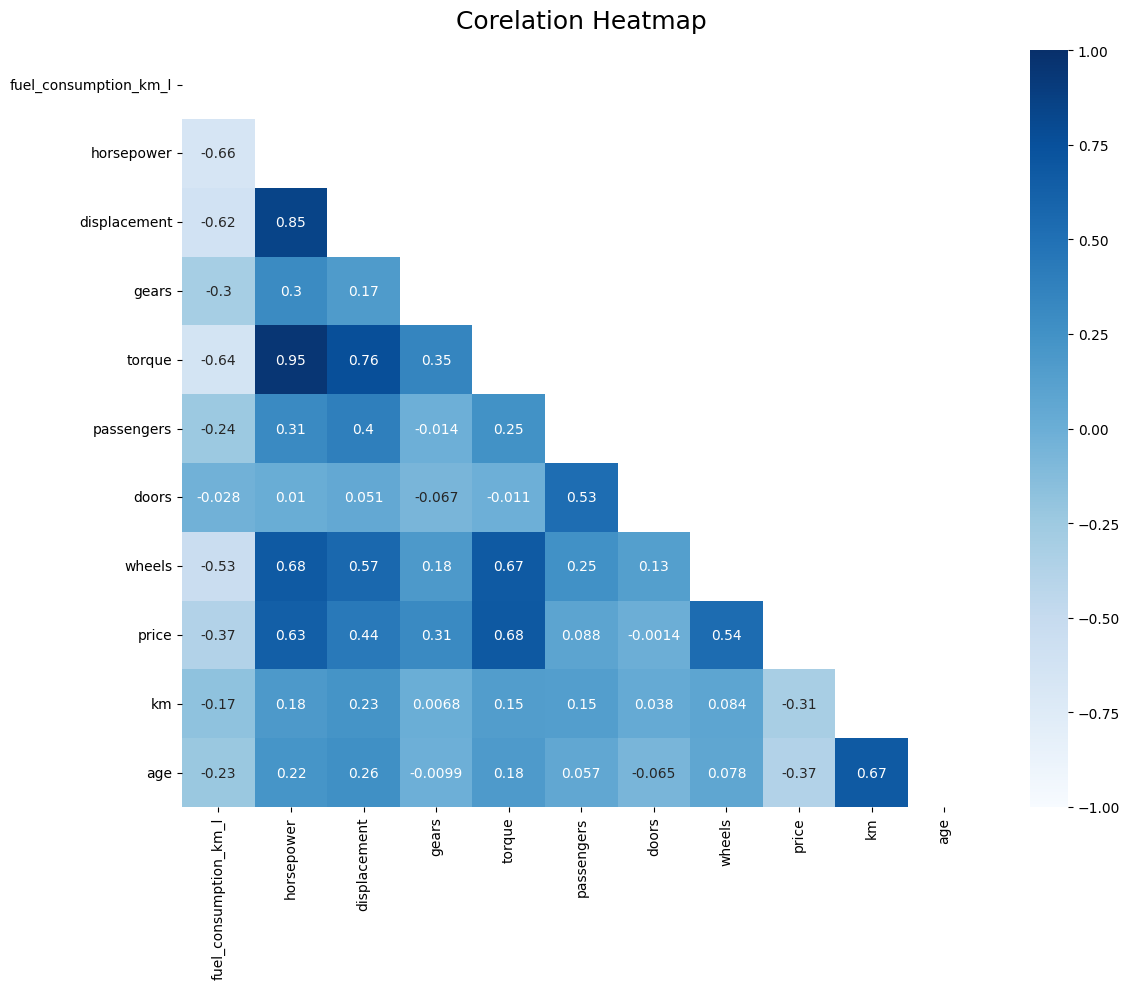

In [30]:
columns_of_interest = [
    'fuel_consumption_km_l', 'horsepower', 'displacement', 'gears',
    'torque', 'passengers', 'doors', 'wheels', 'price', 'km', 'age'
]


correlation_matrix = df[columns_of_interest].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Blues', vmin=-1, vmax=1)
heatmap.set_title('Corelation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.tight_layout()
plt.show()


Positive Correlations with Price:

For every 

Negative Correlation:

Age (-0.37): Older cars tend to have lower prices, which is expected as vehicles typically depreciate over time.

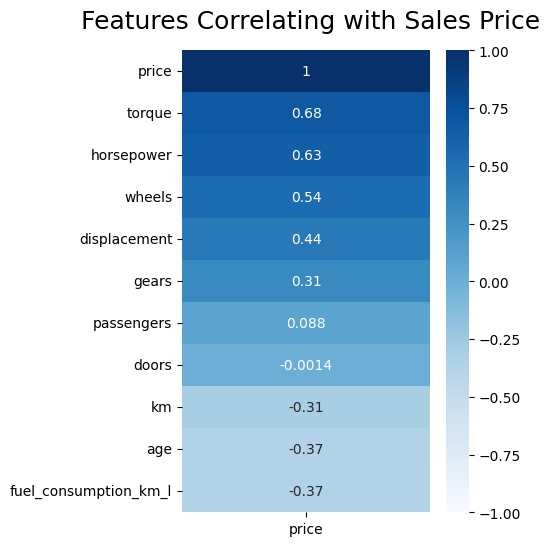

In [31]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df[var_int].corr()[['price']].sort_values(by='price', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title(' Features Correlating with Sales Price', fontdict={'fontsize': 18}, pad=16)
plt.show()

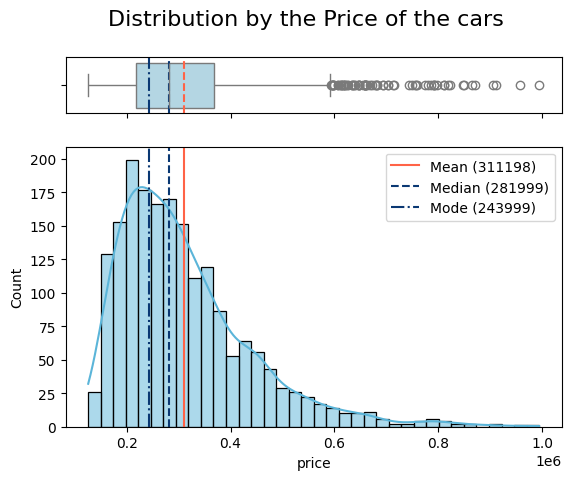

In [32]:

mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="price", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="price", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distribution by the Price of the cars', fontsize=16)
plt.show()

## Age of cars

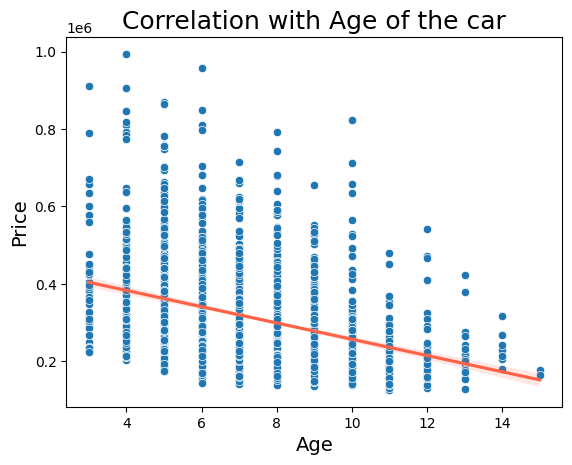

In [33]:
sns.scatterplot(x='age', y='price', data=df)
sns.regplot(x='age', y='price', data=df, scatter=False, color='tomato')

plt.title('Correlation with Age of the car', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

The graph shows a correlation as the car is older, the price decreases. 

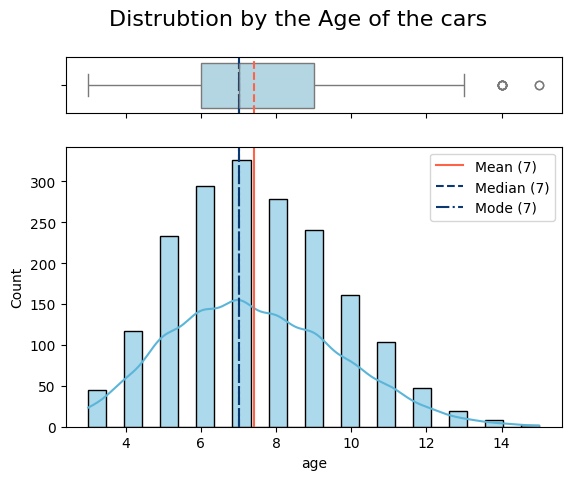

In [34]:
mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="age", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="age", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by the Age of the cars  ', fontsize=16)
plt.show()



From the graph we can almost get a normal distribution with a right decrease showing some old cars (consider outliers) with a concentration of cars owned by the company of 7 years.

## Km 

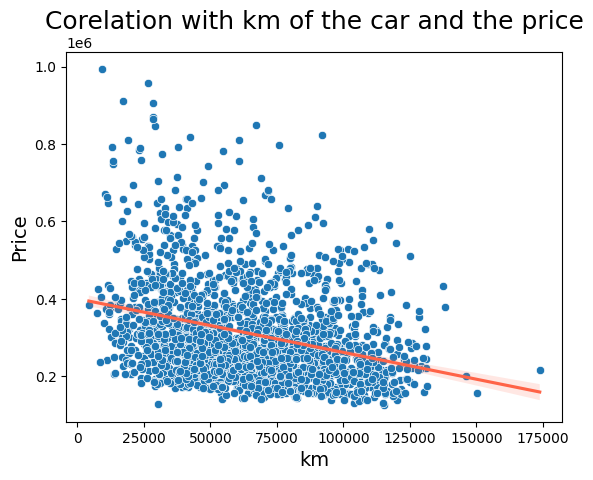

In [35]:
sns.scatterplot(x='km', y='price', data=df)
sns.regplot(x='km', y='price', data=df, scatter=False, color='tomato')

plt.title('Corelation with km of the car and the price', fontsize=18)
plt.xlabel('km', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

From the graph it is a corelation between the price and the total KM traveled

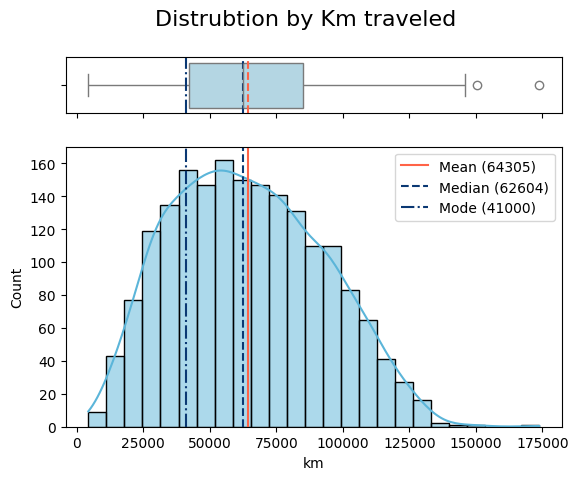

In [36]:
mean = df['km'].mean()
median = df['km'].median()
mode = df['km'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})


sns.boxplot(data=df, x="km", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="km", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by Km traveled', fontsize=16)
plt.show()


There is a normal distribution shown, and most cars have travel between 40,000 and 80,000 km.

## Wheels

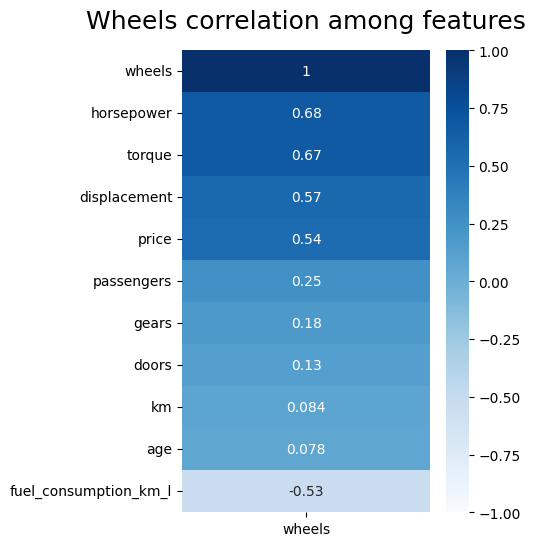

In [37]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df[var_int].corr()[['wheels']].sort_values(by='wheels', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Wheels correlation among features', fontdict={'fontsize': 18}, pad=16)
plt.show()

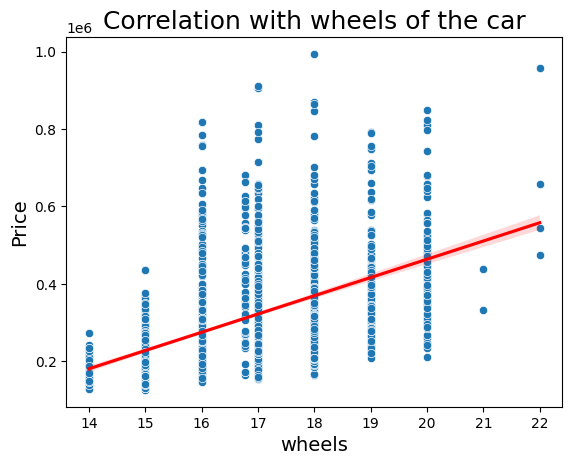

In [38]:
sns.scatterplot(x='wheels', y='price', data=df)
sns.regplot(x='wheels', y='price', data=df, scatter=False, color='red')

plt.title('Correlation with wheels of the car', fontsize=18)
plt.xlabel('wheels', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

As in the general heat map shown, the wheels had a correlation with the price 

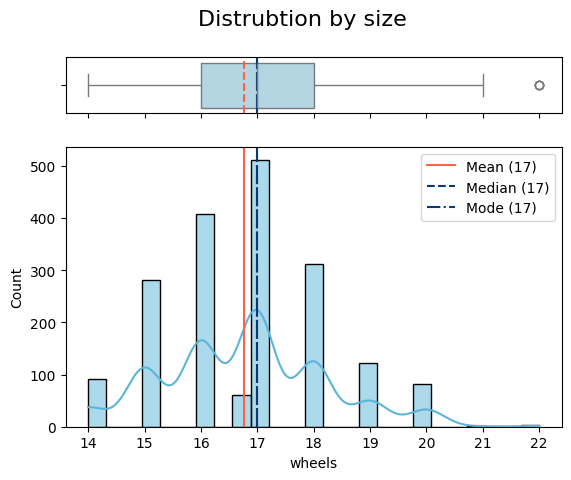

In [39]:
mean = df['wheels'].mean()
median = df['wheels'].median()
mode = df['wheels'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="wheels", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="wheels", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by size ', fontsize=16)

plt.show()



It is shown that the more common wheel size is 17. The distribution is a multimodal, but the most count related to size are 16, 17. and 18.

## Doors

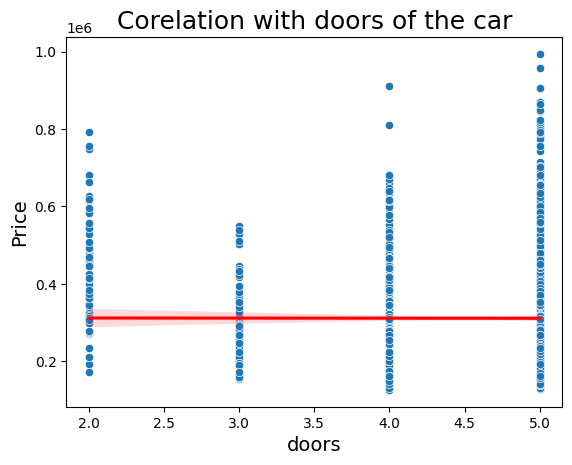

In [40]:
sns.scatterplot(x='doors', y='price', data=df)
sns.regplot(x='doors', y='price', data=df, scatter=False, color='red')

plt.title('Corelation with doors of the car', fontsize=18)
plt.xlabel('doors', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

The number of doors doesnt represents  value for the price

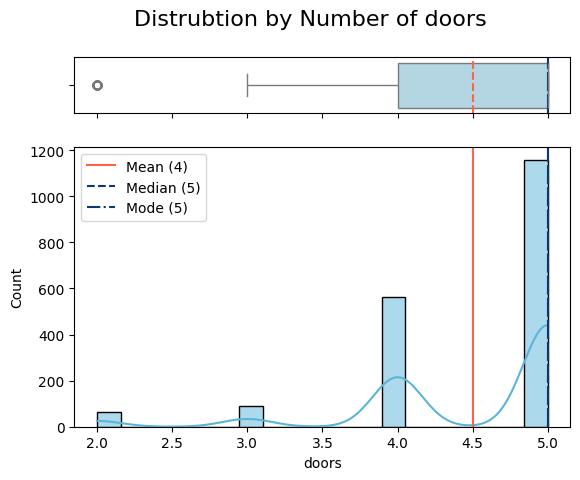

In [41]:
mean = df['doors'].mean()
median = df['doors'].median()
mode = df['doors'].mode().values[0]



palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="doors", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="doors", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by Number of doors ', fontsize=16)

plt.show()


It is shown a multimodal distribution showing that more cars are around 5 doors (trunks and 4 passengers)

## Torque                      

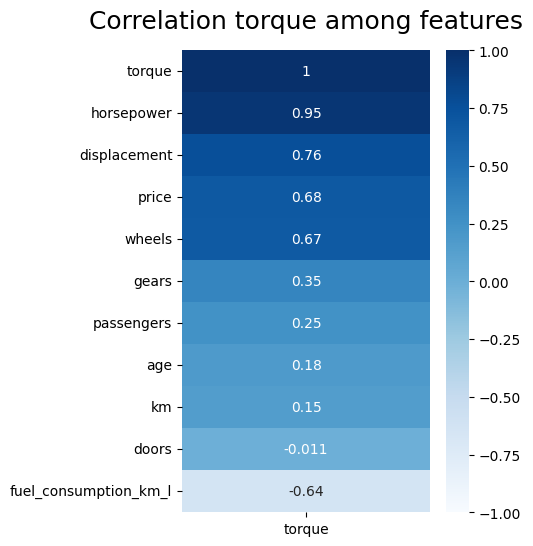

In [42]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df[var_int].corr()[['torque']].sort_values(by='torque', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation torque among features', fontdict={'fontsize': 18}, pad=16)
plt.show()

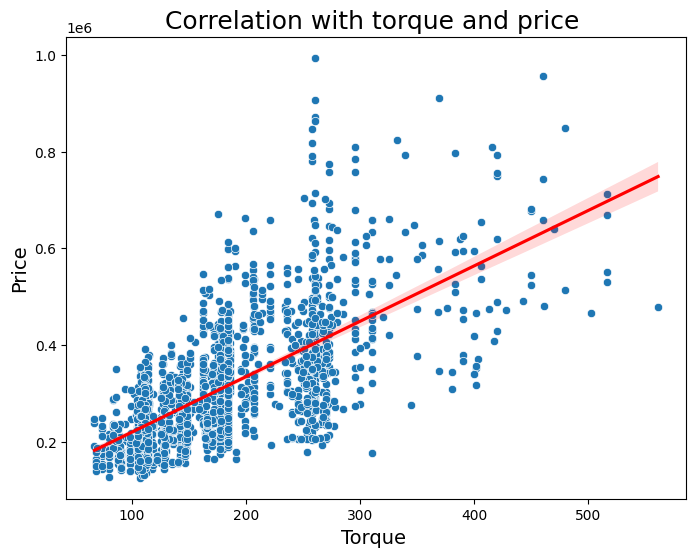

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='torque', y='price', data=df)


sns.regplot(x='torque', y='price', data=df, scatter=False, color='red')


plt.title('Correlation with torque and price ', fontsize=18)
plt.xlabel('Torque ', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.show()

There is a clear corelation witjh the size of the motor and the price of the car 

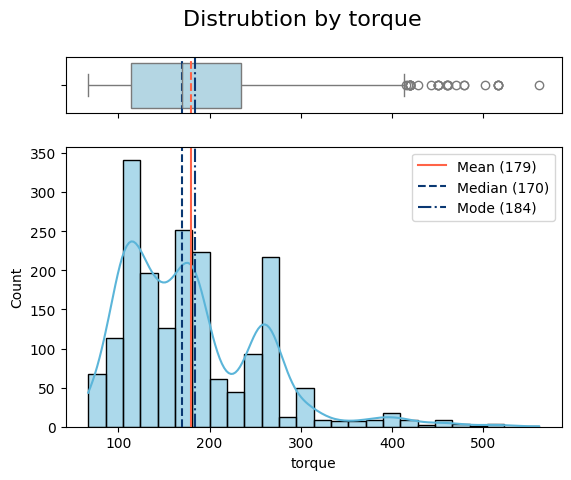

In [44]:
mean = df['torque'].mean()
median = df['torque'].median()
mode = df['torque'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="torque", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="torque", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by torque ', fontsize=16)
plt.show()



Even though most is shown a multimodal distribution, most of the cars have a 100 torque value an as the torque is higher is rarer that there is a car with such a big motor. 

### Gears

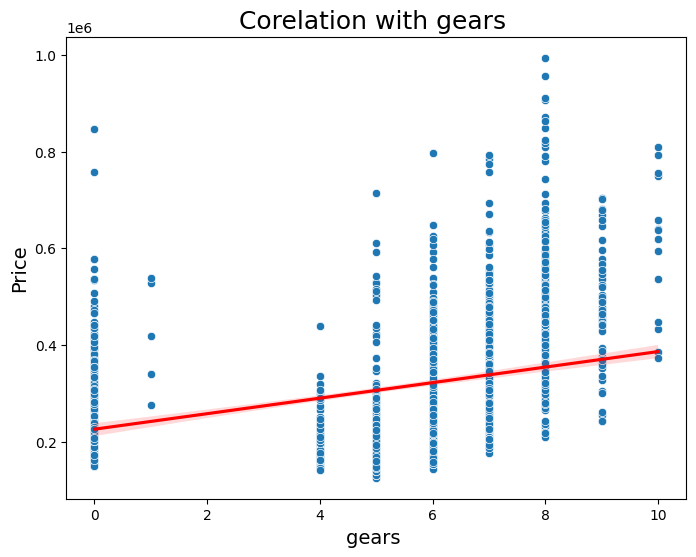

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gears', y='price', data=df)


sns.regplot(x='gears', y='price', data=df, scatter=False, color='red')


plt.title('Corelation with gears ', fontsize=18)
plt.xlabel('gears ', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.show()

Just as all the motor related features the bigger is the motor, the higher the price

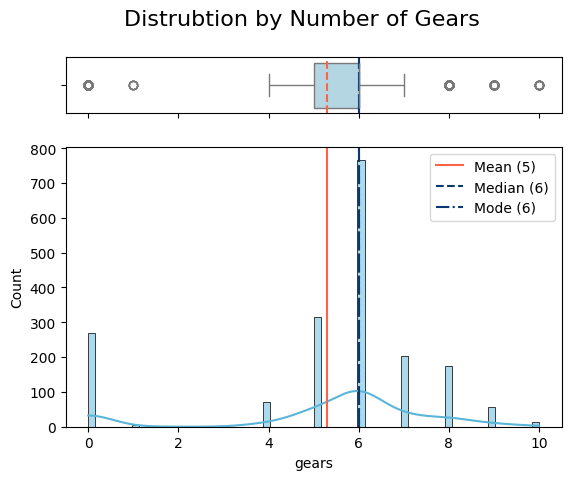

In [46]:
mean = df['gears'].mean()
median = df['gears'].median()
mode = df['gears'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="gears", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="gears", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by Number of Gears ', fontsize=16)
plt.show()



There is a bimodal distribution with in 0 and 6 , showing 0 with the electric cars, and 6 for the combustion motors. If we didint consider 0 gear ith would be a normal distribution. 

## Displacement

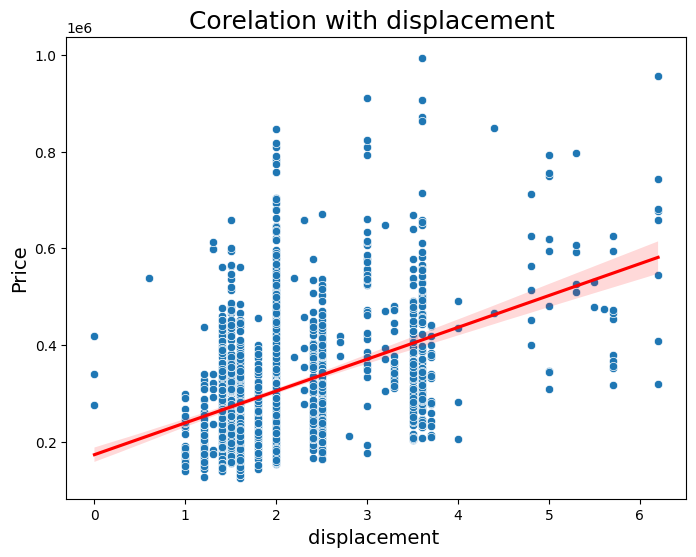

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='displacement', y='price', data=df)
sns.regplot(x='displacement', y='price', data=df, scatter=False, color='red')
plt.title('Corelation with displacement ', fontsize=18)
plt.xlabel('displacement ', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

Motor related 

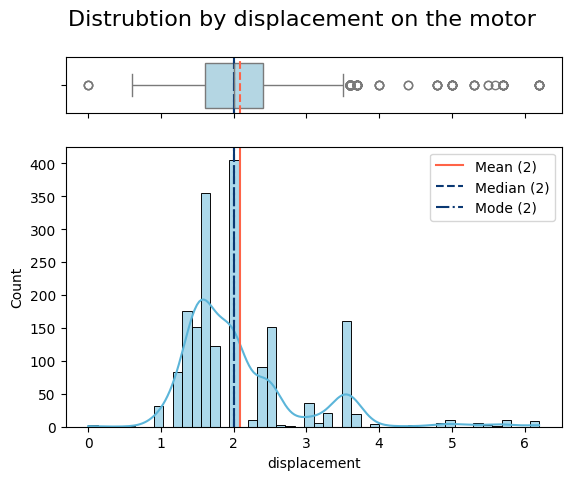

In [48]:
mean = df['displacement'].mean()
median = df['displacement'].median()
mode = df['displacement'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="displacement", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="displacement", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()
f.suptitle('Distrubtion by displacement on the motor ', fontsize=16)


plt.show()


 The histogram shows a right-skewed distribution with a high concentration of cars around 2 liters of engine displacement.

## Horsepower

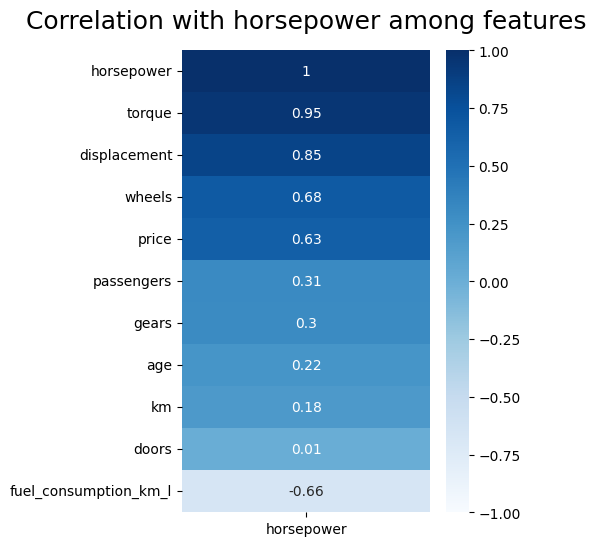

In [49]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df[var_int].corr()[['horsepower']].sort_values(by='horsepower', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation with horsepower among features', fontdict={'fontsize': 18}, pad=16)
plt.show()

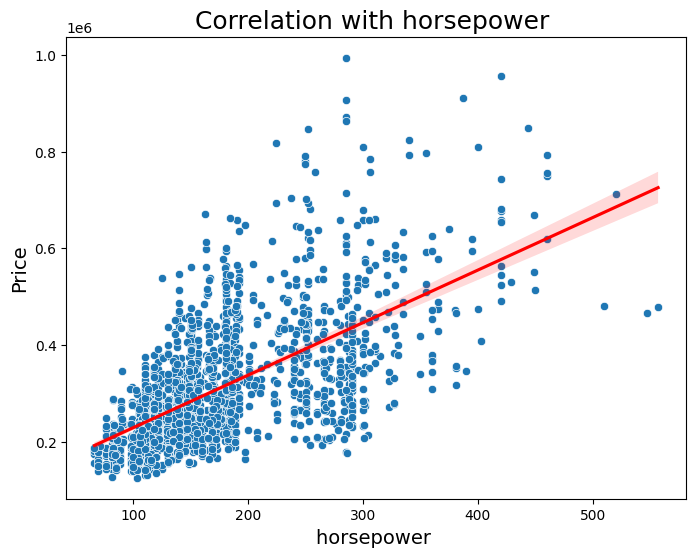

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=df)

sns.regplot(x='horsepower', y='price', data=df, scatter=False, color='red')

plt.title('Correlation with horsepower ', fontsize=18)
plt.xlabel('horsepower ', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

Motor related

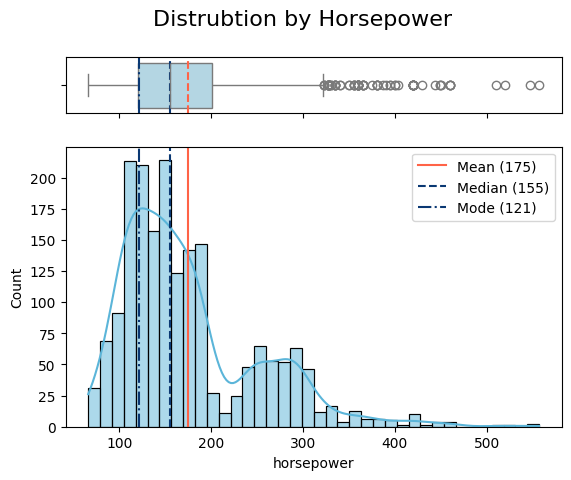

In [51]:
mean = df['horsepower'].mean()
median = df['horsepower'].median()
mode = df['horsepower'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="horsepower", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="horsepower", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()
f.suptitle('Distrubtion by Horsepower ', fontsize=16)

plt.show()



Histogram show a  right-skewed distribution with a high concentration of cars around 100-200 horsepower.

## Fuel Consumption

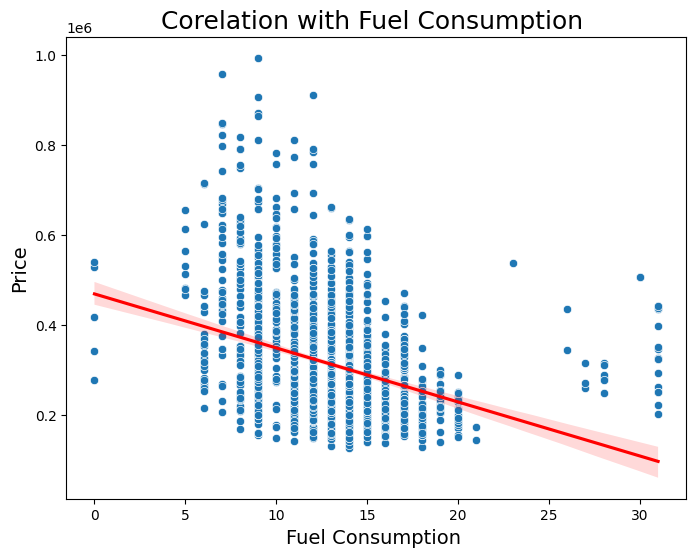

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fuel_consumption_km_l', y='price', data=df)

sns.regplot(x='fuel_consumption_km_l', y='price', data=df, scatter=False, color='red')

plt.title('Corelation with Fuel Consumption ', fontsize=18)
plt.xlabel('Fuel Consumption ', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

it is shown a negative corelation between  fuel consumption and price 

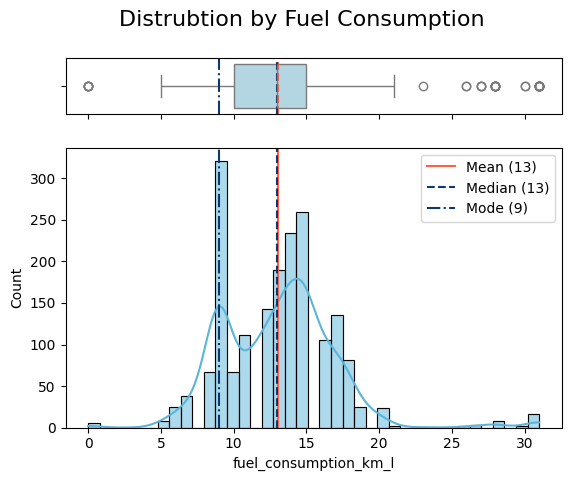

In [53]:
mean = df['fuel_consumption_km_l'].mean()
median = df['fuel_consumption_km_l'].median()
mode = df['fuel_consumption_km_l'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="fuel_consumption_km_l", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="fuel_consumption_km_l", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by Fuel Consumption ', fontsize=16)

plt.show()



Histogram shows a bimodal distribution with two significant peaks around 9 km/l and 13 km/l, indicating these are common fuel consumption rates among the cars

## Passengers

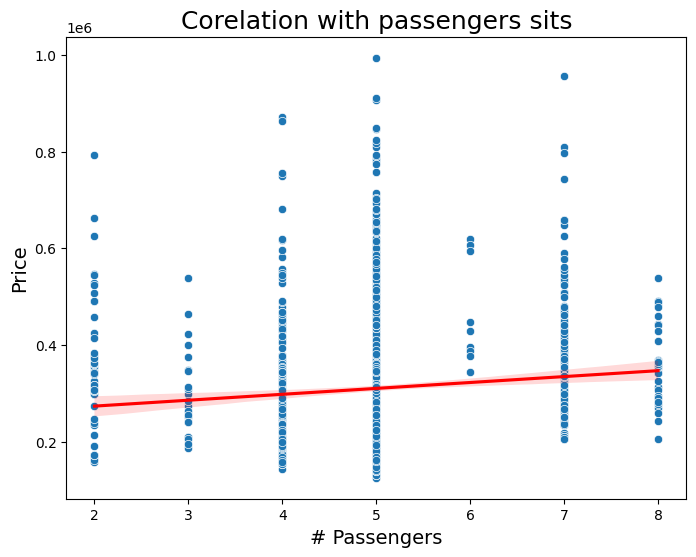

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='passengers', y='price', data=df)


sns.regplot(x='passengers', y='price', data=df, scatter=False, color='red')


plt.title('Corelation with passengers sits', fontsize=18)
plt.xlabel('# Passengers', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.show()

Low corelation, cause by the size of the car 

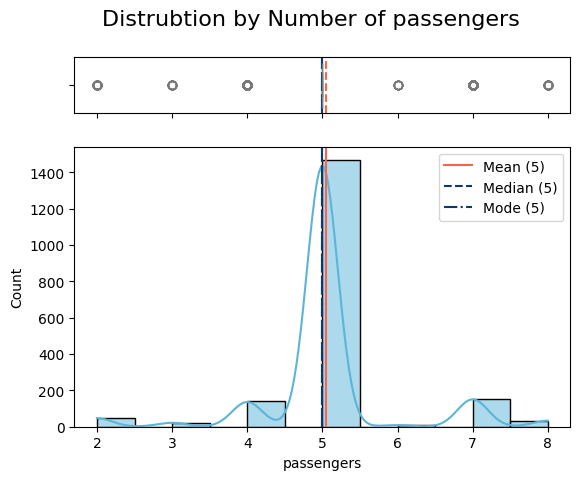

In [55]:
mean = df['passengers'].mean()
median = df['passengers'].median()
mode = df['passengers'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="passengers", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="passengers", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

f.suptitle('Distrubtion by Number of passengers ', fontsize=16)

plt.show()



As the doors must of the cars are around5 passengers 

# Descriptive Statistics

In [56]:
df.describe()


,fuel_consumption_km_l,horsepower,displacement,gears,torque,passengers,doors,wheels,price,km,age
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,13.079509,175.196371,2.091195,5.294023,179.213447,5.049093,4.500000,16.770632,311197.505870,64304.691569,7.418356
std,3.944297,74.506433,0.851112,2.438676,75.774431,0.920051,0.745336,1.450482,127464.556291,28181.172946,2.238575
min,0.000000,66.000000,0.000000,0.000000,67.000000,2.000000,2.000000,14.000000,125999.000000,4300.000000,3.000000
25%,10.000000,120.000000,1.600000,5.000000,114.000000,5.000000,4.000000,16.000000,217999.000000,42001.000000,6.000000
50%,13.000000,155.000000,2.000000,6.000000,170.000000,5.000000,5.000000,17.000000,281999.000000,62604.000000,7.000000
75%,15.000000,201.000000,2.400000,6.000000,234.000000,5.000000,5.000000,18.000000,367999.000000,85098.500000,9.000000
max,31.000000,557.000000,6.200000,10.000000,561.000000,8.000000,5.000000,22.000000,993999.000000,173850.000000,15.000000


# Creating train, test and validation set

In [57]:
train_df, test_df = train_test_split(df, test_size=0.5,random_state=1)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=1)

In [58]:
display(len(train_df), len(test_df), len(val_df)) 

937

468

469

## Reviewing category percentage of sets

In [59]:
per_data = []

# Iterate over columns of object dtype
for col in train_df.select_dtypes(include=['object']):
    # Calculate value counts as percentages
    percentages = train_df[col].value_counts(normalize=True) * 100
    # Iterate over each value and its percentage
    for category, percentage in percentages.items():
        # Append data as a dictionary
        per_data.append({'Column': col, 'Category': category, 'Percentage': percentage})

# Create a new DataFrame from the list of dictionaries
train_df_per = pd.DataFrame(per_data)

In [60]:
train_df_per

,Column,Category,Percentage
0,touch_screen,No,51.120598
1,touch_screen,Sí,48.879402
2,navigation_system,No,66.702241
3,navigation_system,Sí,33.297759
4,push_start,Sí,53.788687
5,push_start,No,46.211313
6,rear_cupholders,Sí,69.903949
7,rear_cupholders,No,30.096051
8,sunroof,No,59.018143
9,sunroof,Sí,40.981857


## Saving sets

In [61]:
train_df.to_csv("use_to_train.csv", index=False, encoding="utf-8")

In [62]:
test_df.to_csv("use_to_test.csv", index=False, encoding="utf-8")

In [63]:
val_df.to_csv("use_to_val.csv", index=False, encoding="utf-8")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a817877f-bc24-4404-a1bc-b1f4f599a592' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>